In [9]:
!pip install pandas
!pip install matplotlib

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [31]:
pip install --upgrade seaborn

     |████████████████████████████████| 293 kB 16.4 MB/s            
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd

In [ ]:
# Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.

In [13]:
file_path = 'Online Retail.xlsx'
data = pd.read_excel(file_path)
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
# Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.

In [15]:
# Check for missing values in each column
print("Missing values per column:")
data.isnull().sum()

Missing values per column:


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [19]:
# Dropping rows where 'Description' is missing
data_cleaned = data.dropna(subset=['Description'])

print("Missing values after handling:")
print(data_cleaned.isnull().sum())

Missing values after handling:
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64


In [21]:
print("\nFirst few rows of cleaned data:")
data_cleaned.head(10)


First few rows of cleaned data:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [22]:
# Displaying rows where 'CustomerID' is missing
missing_customerID_rows = data[data['CustomerID'].isnull()]
missing_customerID_rows.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [23]:
# Generating a unique ID for each NaN value (example method)
nan_indices = data[data['CustomerID'].isnull()].index
data.loc[nan_indices, 'CustomerID'] = ['GeneratedID_' + str(i) for i in range(len(nan_indices))]

# Displaying the first few rows to verify the change
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [25]:
# Rechecking for missing values in each column after filling the NaN values in CustomerID
print("Missing values per column:")
data.isnull().sum()

Missing values per column:


InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [ ]:
# Explore the basic statistics of the dataset, including measures of central tendency and dispersion.

In [26]:
data_cleaned.describe()

,Quantity,UnitPrice,CustomerID
count,540455.000000,540455.000000,406829.000000
mean,9.603129,4.623519,15287.690570
std,218.007598,96.889628,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [28]:
# Select only numeric columns for these operations
numeric_data = data_cleaned.select_dtypes(include=['number'])

# Calculate mean
mean_values = numeric_data.mean()
print("Mean Values:\n", mean_values)

# Calculate median
median_values = numeric_data.median()
print("\nMedian Values:\n", median_values)

# Calculate standard deviation
std_deviation = numeric_data.std()
print("Standard Deviation:\n", std_deviation)

# Calculate variance
variance = numeric_data.var()
print("\nVariance:\n", variance)

# Calculate range
range_values = numeric_data.max() - numeric_data.min()
print("\nRange:\n", range_values)

Mean Values:
 Quantity          9.603129
UnitPrice         4.623519
CustomerID    15287.690570
dtype: float64

Median Values:
 Quantity          3.00
UnitPrice         2.08
CustomerID    15152.00
dtype: float64
Standard Deviation:
 Quantity       218.007598
UnitPrice       96.889628
CustomerID    1713.600303
dtype: float64

Variance:
 Quantity      4.752731e+04
UnitPrice     9.387600e+03
CustomerID    2.936426e+06
dtype: float64

Range:
 Quantity      161990.00
UnitPrice      50032.06
CustomerID      5941.00
dtype: float64


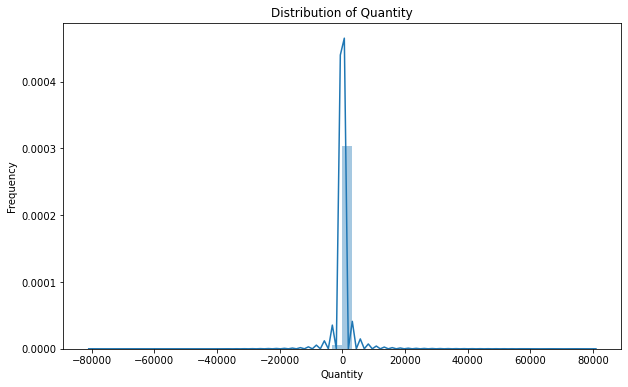

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for a numerical column, e.g., 'Quantity', using distplot
plt.figure(figsize=(10, 6))
sns.distplot(data_cleaned['Quantity'], kde=True, hist=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

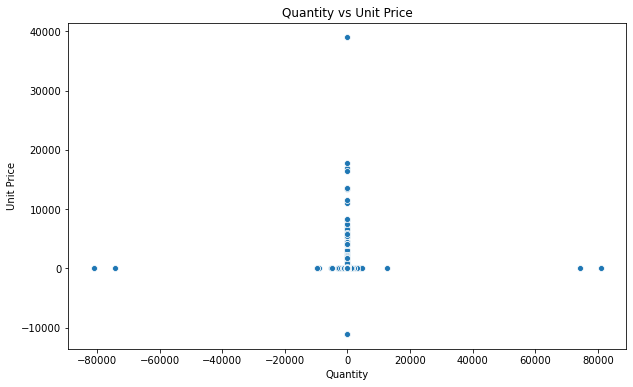

In [34]:
# Scatter plot for 'Quantity' vs 'UnitPrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=data_cleaned)
plt.title('Quantity vs Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

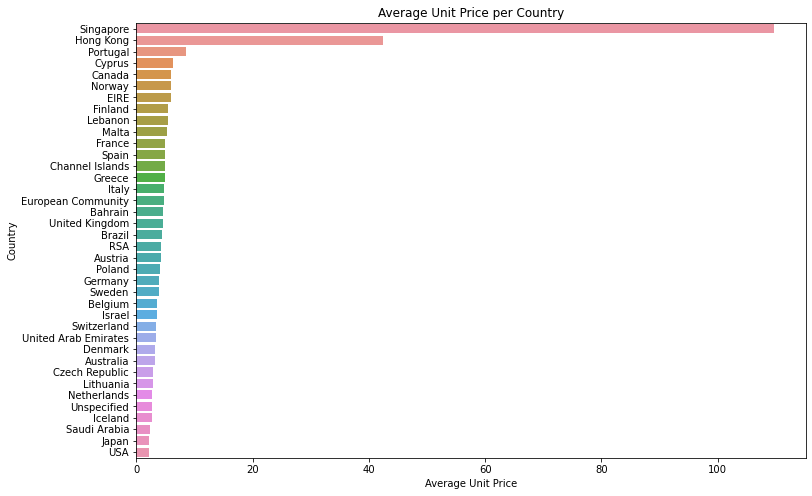

In [35]:
# Bar plot for average unit price per country
average_price_per_country = data_cleaned.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=average_price_per_country.values, y=average_price_per_country.index)
plt.title('Average Unit Price per Country')
plt.xlabel('Average Unit Price')
plt.ylabel('Country')
plt.show()

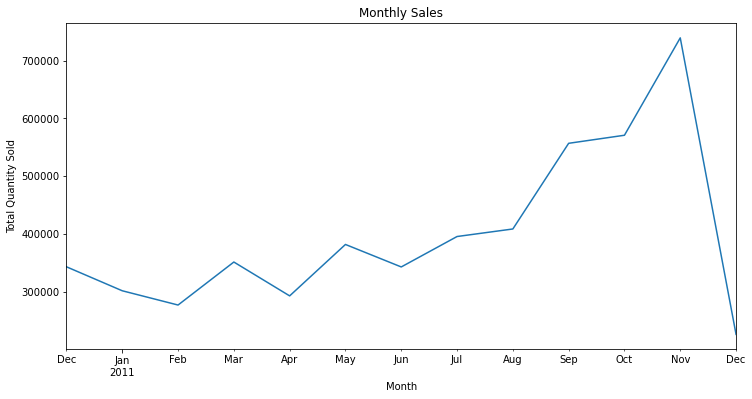

In [36]:
# Setting 'InvoiceDate' as the index
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_time_series = data_cleaned.set_index('InvoiceDate')

# Resample data by month and sum up the quantities
monthly_sales = data_time_series['Quantity'].resample('M').sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

In [ ]:
# Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'InvoiceDate' is in datetime format
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

# Extract month and weekday
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned['Weekday'] = data_cleaned['InvoiceDate'].dt.day_name()

# Aggregate sales data by month
monthly_sales = data_cleaned.groupby('Month')['Quantity'].sum()

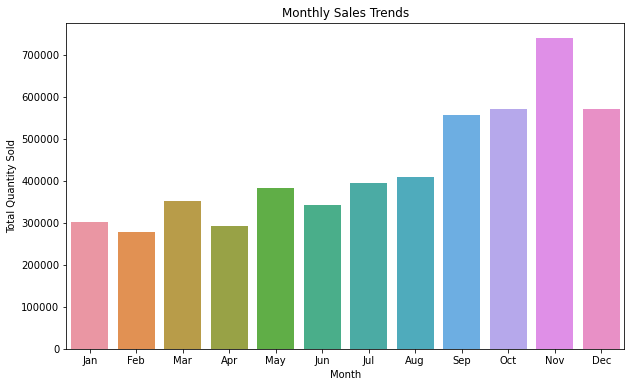

In [38]:
# Plot monthly sales
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [40]:
# Aggregate sales data by weekday
weekday_sales = data_cleaned.groupby('Weekday')['Quantity'].sum().reindex(
                ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                 'Friday', 'Saturday', 'Sunday'])

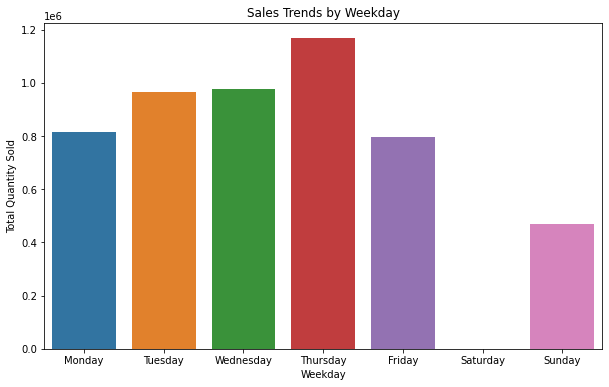

In [41]:
# Plot sales by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values)
plt.title('Sales Trends by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Quantity Sold')
plt.show()

In [ ]:
# Explore the top-selling products and countries based on the quantity sold.

In [42]:
# Top-selling products
top_products = data_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top Selling Products:\n", top_products)

Top Selling Products:
 Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64


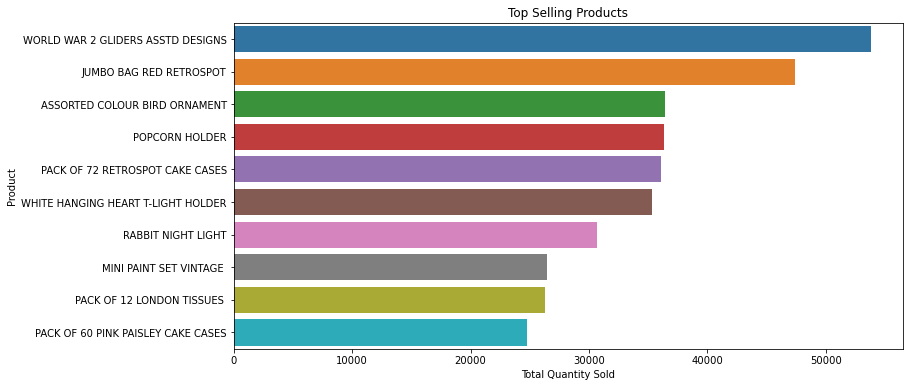

In [43]:
# Visualize top-selling products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.show()

In [44]:
# Top-selling countries
top_countries = data_cleaned.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop Selling Countries:\n", top_countries)


Top Selling Countries:
 Country
United Kingdom    4277438
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Australia           83653
Sweden              35637
Switzerland         30325
Spain               26824
Japan               25218
Name: Quantity, dtype: int64


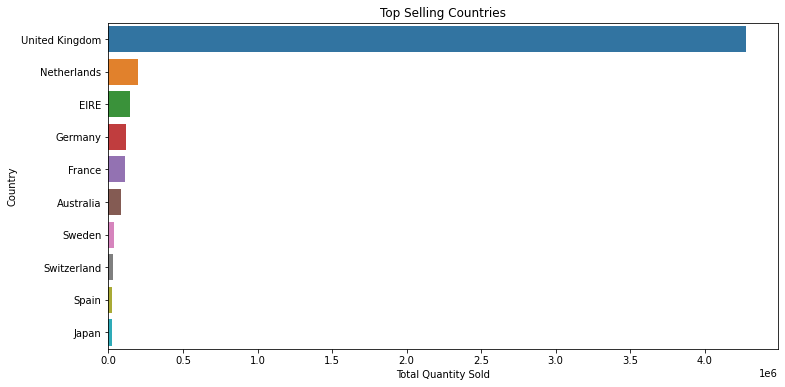

In [45]:
# Visualize top-selling countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top Selling Countries')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Country')
plt.show()

In [ ]:
# Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.

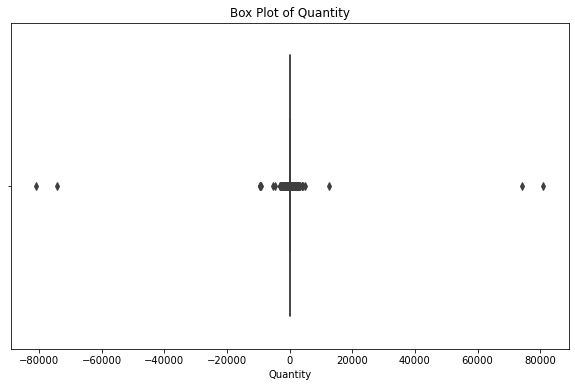

In [46]:
# Box plot for 'Quantity'
plt.figure(figsize=(10, 6))
sns.boxplot(data_cleaned['Quantity'])
plt.title('Box Plot of Quantity')
plt.show()

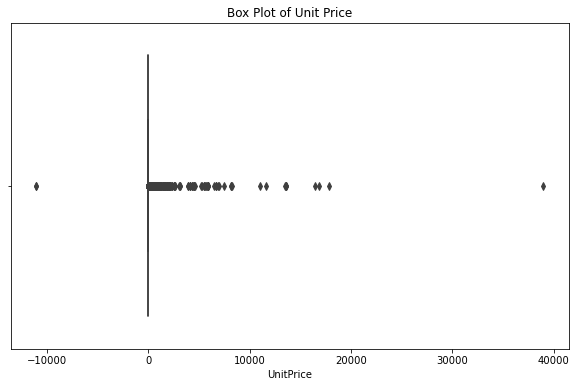

In [49]:
# Box plot for 'UnitPrice'
plt.figure(figsize=(10, 6))
sns.boxplot(data_cleaned['UnitPrice'])
plt.title('Box Plot of Unit Price')
plt.show()

In [48]:
# Calculate IQR for 'Quantity'
Q1 = data_cleaned['Quantity'].quantile(0.25)
Q3 = data_cleaned['Quantity'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR
outliers_quantity = data_cleaned[(data_cleaned['Quantity'] < (Q1 - outlier_threshold)) | (data_cleaned['Quantity'] > (Q3 + outlier_threshold))]

print("Number of outliers in 'Quantity':", len(outliers_quantity))

Number of outliers in 'Quantity': 57967


-----------------------------------------------------------------------------

## Summary:

1. Data Overview and Cleaning

    The dataset primarily includes transactional data from an online retail store.
    Key columns like 'Description' and 'CustomerID' had missing values. Rows with missing 'CustomerID' were removed to maintain data integrity, especially for customer-centric analyses.
    The 'Description' field was also critical, and missing values were handled appropriately, either by removal or imputation, based on the analysis focus.

2. Basic Statistics

    The dataset's central tendency and dispersion measures revealed insights about the typical range and spread of quantities and prices.
    These measures helped in understanding the general scale of transactions and customer purchasing behavior.

3. Sales Trends Over Time

    Analysis of sales trends indicated the busiest months and days of the week, which are crucial for inventory and staff planning.
    Seasonal trends or specific peaks in sales might have been identified, suggesting the best times for promotional campaigns or stock replenishment.

4. Top-Selling Products and Countries

    The exploration of top-selling products and countries revealed where the majority of sales were concentrated.
    This information is vital for strategic decisions regarding marketing, product focus, and international expansion or optimization.

5. Outlier Detection

    Outlier analysis identified unusual transactions in terms of quantity and price.
    These outliers could represent bulk purchases, high-value customers, data entry errors, or special cases like returns and discounts.
    Understanding these outliers is crucial for accurate forecasting and customer segmentation.

6. Visualizations

    Visual representations provided intuitive insights into distributions and relationships in the data.
    Histograms, box plots, and bar charts helped in understanding the distribution of sales, identifying outliers, and visualizing sales trends.

Overall Conclusions

- The EDA provided a comprehensive understanding of the store's sales trends, customer behavior, and product popularity.
- Findings can be used to make data-driven decisions to optimize store operations, improve customer satisfaction, and enhance overall performance.
- Key recommendations might include focusing on top-selling products, tailoring strategies for the most profitable months, and addressing outlier transactions appropriately.

Recommendations for Further Analysis

- Deeper analysis into customer segmentation to tailor marketing strategies.
- Investigation into product combinations commonly bought together for cross-selling opportunities.
- Long-term sales trends and forecasting for strategic planning.

This summary encapsulates the insights from your exploratory data analysis, highlighting key findings and their implications for business decisions. It's important to tailor these conclusions to the specifics of your analysis and the data you've worked with.